# Exploratory Data Analysis on Steam Game Dataset
#### Brent Min, Jack Lin

Abstract:  
      In this Result Replication project, the aim is th observe how well the baseline models defined in the paper "Are We Really Making Much Progress?" perform in comparision to another recommender system: SASRec. The SASRec paper outputted metrics on four datasets: Amazon Beauty Products, Amazon Videos, Steam Games, and the MovieLens Dataset. We will be using the Steam Dataset, which is a User Content Matrix (UCM) that ontains games played by Users, to see how well the baseline models perform on it.

## 0. Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html

In [15]:
path = './data/Steam.txt'
data = pd.read_csv(path, sep=" ", header=None)
data.columns = ['user', 'game']

In [78]:
# Display Dataframes Side by Side
# Source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## 1. Overview of Users, Games

In [57]:
data.head()

,user,game
0,1,12179
1,1,4675
2,1,11374
3,1,1807
4,1,8919


In [89]:
# Number of Games Played Per User
numGames_user = data.groupby('user').count().sort_values('game', ascending=False)
numGames_user.columns = ['# of Games Played']
# Number of Plays per Game
gamesFreq = data.groupby('game').count().sort_values('user', ascending=False)
gamesFreq.columns = ['Gameplay Count']

# Display Top 5, Descending Order
display_side_by_side(numGames_user.head(10), gamesFreq.head(10))

,# of Games Played
user,
18,1231
24,1084
1864,881
2352,871
1923,864
9971,811
463,805
222,763
1729,738


In [84]:
# Summary Statistics for Games Played By Users 
userFreq_stats = pd.DataFrame(numGames_user.describe())
userFreq_stats.columns = ['count']

# Summary Statistics Of Gameplay Count
gamesFreq_stats = pd.DataFrame(gamesFreq.describe())
gamesFreq_stats.columns = ['count']

# Display Summary Statistics
print('Summary Statistics for Games Played By Users')
display(userFreq_stats)
print('\nSummary Statistics Of Gameplay Count')
display(gamesFreq_stats)

Summary Statistics for Games Played By Users


,count
count,334730.000000
mean,11.012374
std,18.311805
min,1.000000
25%,5.000000
50%,7.000000
75%,11.000000
max,1231.000000



Summary Statistics Of Gameplay Count


,count
count,13047.000000
mean,282.530237
std,1050.301474
min,1.000000
25%,11.000000
50%,33.000000
75%,139.000000
max,37500.000000


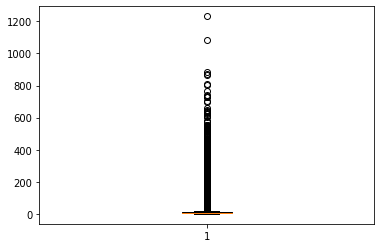

In [110]:
# Box Plot of Games by Gameplay Count
plt.boxplot(numGames_user.iloc[:,0]);

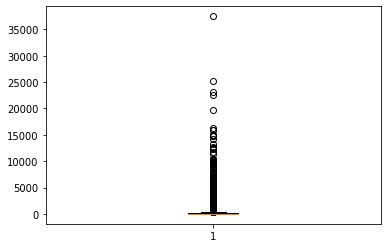

In [111]:
# Box Plot of Games by Gameplay Count
plt.boxplot(gamesFreq.iloc[:,0]);